In [1]:
%pip install google-cloud
%pip install pandas
import math
from pprint import pprint
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from google.cloud import storage
df_train = pd.read_csv('gs://sukanya358/train1.csv')
df_test = pd.read_csv('gs://sukanya358/test1.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [7]:
y_cat = {'no': 0, 
         'yes': 1}
df_train['y'] = df_train['y'].replace(y_cat)
df_test['y'] = df_test['y'].replace(y_cat)

cat = {'no': 0, 
       'yes': 1}
df_train['job'] = df_train['job'].replace(cat)
df_train['default'] = df_train['default'].replace(cat)
df_train['housing'] = df_train['housing'].replace(cat)
df_train['loan'] = df_train['loan'].replace(cat)
df_test['job'] = df_test['job'].replace(cat)
df_test['default'] = df_test['default'].replace(cat)
df_test['housing'] = df_test['housing'].replace(cat)
df_test['loan'] = df_test['loan'].replace(cat)

j_cat = {'unknown': 0,
         'admin.': 1,
         'unemployed': 2,
         'management': 3,
         'housemaid': 4,
         'entrepreneur': 5,
         'student': 6,
         'blue-collar': 7,
         'self-employed': 8,
         'retired': 9,
         'technician': 10,
         'services': 11}
df_train['job'] = df_train['job'].replace(j_cat)
df_test['job'] = df_test['job'].replace(j_cat)

ed_cat = {'unknown': 0, 
          'primary': 1,
          'secondary': 2,
          'tertiary': 3}
df_train['education'] = df_train['education'].replace(ed_cat)
df_test['education'] = df_test['education'].replace(ed_cat)

ma_cat = {'single': 0, 
          'divorced': 1,
          'married': 2}
df_train['marital'] = df_train['marital'].replace(ma_cat)
df_test['marital'] = df_test['marital'].replace(ma_cat)

con_cat = {'unknown': 0, 
          'telephone': 1,
          'cellular': 2}
df_train['contact'] = df_train['contact'].replace(con_cat)
df_test['contact'] = df_test['contact'].replace(con_cat)

m_cat = {'jan': 1,
         'feb': 2,
         'mar': 3,
         'apr': 4,
         'may': 5,
         'jun': 6,
         'jul': 7,
         'aug': 8,
         'sep': 9,
         'oct': 10,
         'nov': 11,
         'dec': 12}
df_train['month'] = df_train['month'].replace(m_cat)
df_test['month'] = df_test['month'].replace(m_cat)

p_cat = {'unknown': 0, 
          'other': 1,
          'failure': 2,
          'success': 3}
df_train['poutcome'] = df_train['poutcome'].replace(p_cat)
df_test['poutcome'] = df_test['poutcome'].replace(p_cat)

da_cat = {-1: 0}
df_train['pdays'] = df_train['pdays'].replace(da_cat)
df_test['pdays'] = df_test['pdays'].replace(da_cat)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  y          45211 non-null  int64
dtypes: int64(17)
memory usage: 5.9 MB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int64
 1   job        4521 non-null   int64
 2   marital    4521 non-null   int64
 3   education  4521 non-null   int64
 4   default    4521 non-null   int64
 5   balance    4521 non-null   int64
 6   housing    4521 non-null   int64
 7   loan       4521 non-null   int64
 8   contact    4521 non-null   int64
 9   day        4521 non-null   int64
 10  month      4521 non-null   int64
 11  duration   4521 non-null   int64
 12  campaign   4521 non-null   int64
 13  pdays      4521 non-null   int64
 14  previous   4521 non-null   int64
 15  poutcome   4521 non-null   int64
 16  y          4521 non-null   int64
dtypes: int64(17)
memory usage: 600.6 KB


In [10]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,3,2,3,0,2143,1,0,0,5,5,261,1,0,0,0,0
1,44,10,0,2,0,29,1,0,0,5,5,151,1,0,0,0,0
2,33,5,2,2,0,2,1,1,0,5,5,76,1,0,0,0,0
3,47,7,2,0,0,1506,1,0,0,5,5,92,1,0,0,0,0
4,33,0,0,0,0,1,0,0,0,5,5,198,1,0,0,0,0


In [11]:
df_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,2,2,1,0,1787,0,0,2,19,10,79,1,0,0,0,0
1,33,11,2,2,0,4789,1,1,2,11,5,220,1,339,4,2,0
2,35,3,0,3,0,1350,1,0,2,16,4,185,1,330,1,2,0
3,30,3,2,3,0,1476,1,1,0,3,6,199,4,0,0,0,0
4,59,7,2,2,0,0,1,0,0,5,5,226,1,0,0,0,0


<AxesSubplot:>

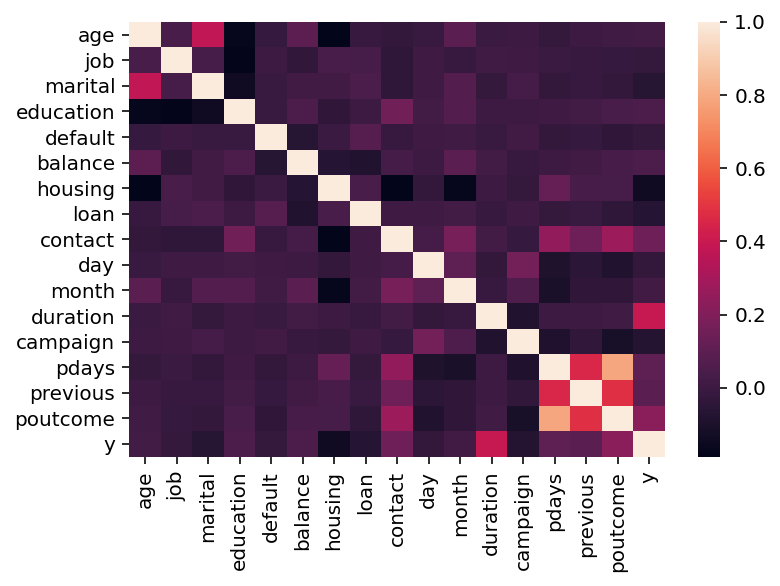

In [12]:
sns.heatmap(df_train.corr())

In [13]:
dcorr = df_train.corr()
dcorr.style.background_gradient(cmap='Reds')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,0.040074,0.376104,-0.173615,-0.017879,0.097783,-0.185513,-0.015655,-0.026221,-0.009120,0.092903,-0.004648,0.004760,-0.023841,0.001288,0.014363,0.025155
job,0.040074,1.000000,0.031073,-0.179254,0.002180,-0.034356,0.042724,0.031090,-0.040966,0.008070,-0.014060,0.011734,0.008434,-0.005496,-0.015335,-0.020980,-0.025396
marital,0.376104,0.031073,1.000000,-0.137510,-0.009584,0.020602,0.020202,0.046738,-0.040757,0.007701,0.069718,-0.022895,0.029121,-0.029472,-0.015676,-0.027295,-0.065668
education,-0.173615,-0.179254,-0.137510,1.000000,-0.009035,0.050572,-0.038689,0.004307,0.151481,0.021661,0.067935,0.002554,0.000194,0.006975,0.025295,0.041036,0.051341
default,-0.017879,0.002180,-0.009584,-0.009035,1.000000,-0.066745,-0.006025,0.077234,-0.015404,0.009424,0.014989,-0.010021,0.016822,-0.029927,-0.018329,-0.039593,-0.022419
balance,0.097783,-0.034356,0.020602,0.050572,-0.066745,1.000000,-0.068768,-0.084350,0.027273,0.004503,0.094605,0.021560,-0.014578,0.003330,0.016674,0.034865,0.052838
housing,-0.185513,0.042724,0.020202,-0.038689,-0.006025,-0.068768,1.000000,0.041323,-0.188123,-0.027982,-0.173887,0.005075,-0.023599,0.124350,0.037076,0.031062,-0.139173
loan,-0.015655,0.031090,0.046738,0.004307,0.077234,-0.084350,0.041323,1.000000,0.010873,0.011370,0.021638,-0.012412,0.009980,-0.022709,-0.011043,-0.039928,-0.068185
contact,-0.026221,-0.040966,-0.040757,0.151481,-0.015404,0.027273,-0.188123,0.010873,1.000000,0.027936,0.173779,0.020839,-0.019614,0.244526,0.147811,0.272710,0.148395
day,-0.009120,0.008070,0.007701,0.021661,0.009424,0.004503,-0.027982,0.011370,0.027936,1.000000,0.101989,-0.030206,0.162490,-0.093024,-0.051710,-0.081519,-0.028348


In [14]:
train=df_train[['duration','poutcome','contact','housing','pdays','previous','campaign','loan','marital','y']]

In [15]:
train

,duration,poutcome,contact,housing,pdays,previous,campaign,loan,marital,y
0,261,0,0,1,0,0,1,0,2,0
1,151,0,0,1,0,0,1,0,0,0
2,76,0,0,1,0,0,1,1,2,0
3,92,0,0,1,0,0,1,0,2,0
4,198,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
45206,977,0,2,0,0,0,3,0,2,1
45207,456,0,2,0,0,0,2,0,1,1
45208,1127,3,2,0,184,3,5,0,2,1
45209,508,0,1,0,0,0,4,0,2,0


In [16]:
tcorr = train.corr()
tcorr.style.background_gradient(cmap='Reds')

,duration,poutcome,contact,housing,pdays,previous,campaign,loan,marital,y
duration,1.000000,0.013304,0.020839,0.005075,-0.001584,0.001203,-0.084570,-0.012412,-0.022895,0.394521
poutcome,0.013304,1.000000,0.272710,0.031062,0.789827,0.481341,-0.111592,-0.039928,-0.027295,0.221128
contact,0.020839,0.272710,1.000000,-0.188123,0.244526,0.147811,-0.019614,0.010873,-0.040757,0.148395
housing,0.005075,0.031062,-0.188123,1.000000,0.124350,0.037076,-0.023599,0.041323,0.020202,-0.139173
pdays,-0.001584,0.789827,0.244526,0.124350,1.000000,0.454288,-0.088508,-0.022709,-0.029472,0.103323
previous,0.001203,0.481341,0.147811,0.037076,0.454288,1.000000,-0.032855,-0.011043,-0.015676,0.093236
campaign,-0.084570,-0.111592,-0.019614,-0.023599,-0.088508,-0.032855,1.000000,0.009980,0.029121,-0.073172
loan,-0.012412,-0.039928,0.010873,0.041323,-0.022709,-0.011043,0.009980,1.000000,0.046738,-0.068185
marital,-0.022895,-0.027295,-0.040757,0.020202,-0.029472,-0.015676,0.029121,0.046738,1.000000,-0.065668
y,0.394521,0.221128,0.148395,-0.139173,0.103323,0.093236,-0.073172,-0.068185,-0.065668,1.000000


In [17]:
X_train = train.drop(['y'],axis='columns')
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,poutcome,3.44
4,pdays,3.27
2,contact,2.61
8,marital,2.48
3,housing,1.94
0,duration,1.79
6,campaign,1.65
5,previous,1.41
7,loan,1.19


In [18]:
test=df_test[['duration','poutcome','contact','housing','pdays','previous','campaign','loan','marital','y']]

In [19]:
train.to_csv('traindata.csv', index=False)
test.to_csv('testdata.csv', index=False)

In [20]:
%%bash
gsutil -m cp traindata.csv gs://sukanya358/traindata.csv
gsutil -m cp testdata.csv gs://sukanya358/testdata.csv

Copying file://traindata.csv [Content-Type=text/csv]...
/ [1/1 files][978.0 KiB/978.0 KiB] 100% Done                                    
Operation completed over 1 objects/978.0 KiB.                                    
Copying file://testdata.csv [Content-Type=text/csv]...
/ [1/1 files][ 97.9 KiB/ 97.9 KiB] 100% Done                                    
Operation completed over 1 objects/97.9 KiB.                                     
